In [79]:
# Import the machine learning libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
#import warnings
#warnings.filterwarnings("ignore")
#%matplotlib inline

In [80]:
# Load the Air Passengers (Number of air passengers per month) dataset.
# The dataset can be downloaded here: https://www.kaggle.com/rakannimer/air-passengers.
df = pd.read_csv('AirPassengers.csv')
print(df.shape)

(144, 2)


In [81]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [82]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [83]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")

In [84]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [85]:
df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [86]:
# Split the dataset into the training set and test subsets.
train, test = df[:-12], df[-12:]
print(train.shape, test.shape)

(132, 1) (12, 1)


In [87]:
# Scaling.
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [88]:
# Network parameters.
n_input = 12
n_features = 1

# Automatically transform both univariate and multivariate time series data into samples.
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [89]:
# Print the input and output components of each sample.
for i in range(len(generator)):
    x, y = generator[i]
    print('%s => %s' % (x, y))

[[[0.01758242]
  [0.03076923]
  [0.06153846]
  [0.05494505]
  [0.03736264]
  [0.06813187]
  [0.0967033 ]
  [0.0967033 ]
  [0.07032967]
  [0.03296703]
  [0.        ]
  [0.03076923]]

 [[0.03076923]
  [0.06153846]
  [0.05494505]
  [0.03736264]
  [0.06813187]
  [0.0967033 ]
  [0.0967033 ]
  [0.07032967]
  [0.03296703]
  [0.        ]
  [0.03076923]
  [0.02417582]]

 [[0.06153846]
  [0.05494505]
  [0.03736264]
  [0.06813187]
  [0.0967033 ]
  [0.0967033 ]
  [0.07032967]
  [0.03296703]
  [0.        ]
  [0.03076923]
  [0.02417582]
  [0.04835165]]

 [[0.05494505]
  [0.03736264]
  [0.06813187]
  [0.0967033 ]
  [0.0967033 ]
  [0.07032967]
  [0.03296703]
  [0.        ]
  [0.03076923]
  [0.02417582]
  [0.04835165]
  [0.08131868]]

 [[0.03736264]
  [0.06813187]
  [0.0967033 ]
  [0.0967033 ]
  [0.07032967]
  [0.03296703]
  [0.        ]
  [0.03076923]
  [0.02417582]
  [0.04835165]
  [0.08131868]
  [0.06813187]]

 [[0.06813187]
  [0.0967033 ]
  [0.0967033 ]
  [0.07032967]
  [0.03296703]
  [0.        ]


In [90]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.compile(optimizer='adam', loss='mse')

In [92]:
history = model.fit_generator(generator,epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 16ms/step - loss: 0.1113
Epoch 2/100
20/20 [==============================] - 0s 16ms/step - loss: 0.0178
Epoch 3/100
20/20 [==============================] - 0s 17ms/step - loss: 0.0116
Epoch 4/100
20/20 [==============================] - 0s 16ms/step - loss: 0.0130
Epoch 5/100
20/20 [==============================] - 0s 16ms/step - loss: 0.0100
Epoch 6/100
20/20 [==============================] - 0s 16ms/step - loss: 0.0063
Epoch 7/100
20/20 [==============================] - 0s 17ms/step - loss: 0.0078
Epoch 8/100
20/20 [==============================] - 0s 16ms/step - loss: 0.0066
Epoch 9/100
20/20 [==============================] - 0s 16ms/step - loss: 0.0088
Epoch 10/100
20/20 [==============================] - 0s 17ms/step - loss: 0.0100
Epoch 11/100
20/20 [==============================] - 0s 17ms/step - loss: 0.0077
Epoch 12/100
20/20 [==============================] - 0s 16ms/step - loss: 0.0073
Epoch 13/100
20/20 [=====

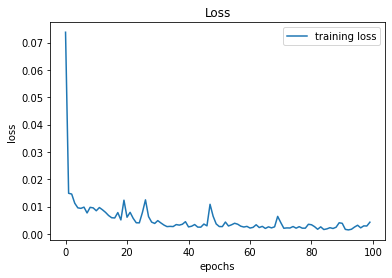

In [93]:
plt.plot(history.history['loss'], label='training loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [94]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [95]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])

df_test = pd.concat([df,df_predict], axis=1)

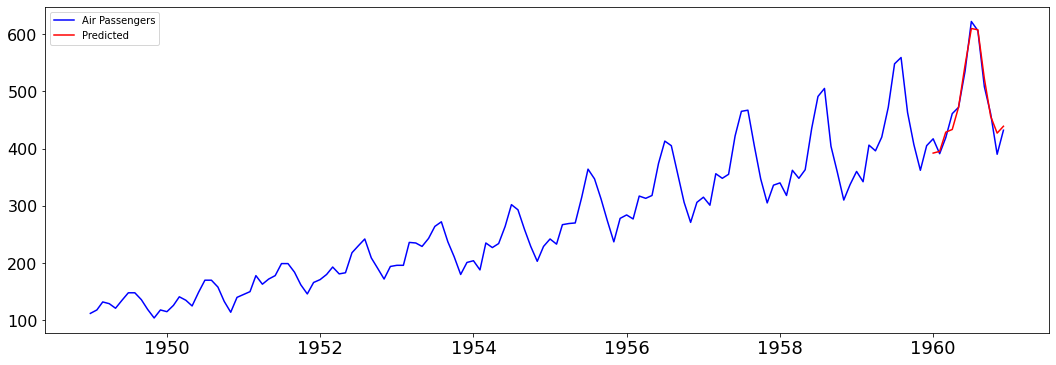

In [96]:
plt.figure(figsize=(18, 6))
plt.plot(df_test.index, df_test['#Passengers'], label='Air Passengers', color='b')
plt.plot(df_test.index, df_test['Prediction'], label='Predicted', color='r')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.legend(loc='best')
plt.show()

In [97]:
# Print Root Mean Square Error (RMSE) and R^2 (coefficient of determination).
pred_actual_rmse = rmse(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
pred_actual_r2 = r2_score(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
print("RMSE: ", pred_actual_rmse)
print("R squared: ", pred_actual_r2)

RMSE:  [16.82248909]
R squared:  0.9489127974724343
